In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/refrigerator/kaggle

/content/gdrive/MyDrive/refrigerator/kaggle


In [ ]:
! mkdir /content/gdrive/MyDrive/refrigerator/kaggle/recipe
%cd /content/gdrive/MyDrive/refrigerator/kaggle/recipe

mkdir: cannot create directory ‘/content/gdrive/MyDrive/refrigerator/kaggle/recipe’: File exists
/content/gdrive/MyDrive/refrigerator/kaggle/recipe


In [ ]:
! mkdir ~/.kaggle
! cp /content/gdrive/MyDrive/refrigerator/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download shuyangli94/food-com-recipes-and-user-interactions

food-com-recipes-and-user-interactions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/gdrive/MyDrive/refrigerator/kaggle/recipe/food-com-recipes-and-user-interactions.zip

Archive:  /content/gdrive/MyDrive/refrigerator/kaggle/recipe/food-com-recipes-and-user-interactions.zip
replace PP_recipes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import seaborn as sns

nutrition - calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV) ,carbohydrates (PDV)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/refrigerator/kaggle/recipe/RAW_recipes.csv')

In [ ]:
print(df.shape)
display(df.head(5))
pd.set_option('max_colwidth',None)
display(df['tags'].head(5))

(231637, 12)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


0                                                                                                                                                                ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']
1                                                                                                                                                          ['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']
2                                                                                                                                               

In [ ]:
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df.nutrition.str.split(",",expand=True) 

In [ ]:
df['calories'] =  df['calories'].apply(lambda x: x.replace('[','')) 

In [ ]:
df['carbohydrates (PDV)'] =  df['carbohydrates (PDV)'].apply(lambda x: x.replace(']','')) 

In [ ]:
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')

In [ ]:
df.dtypes

name                    object
id                       int64
minutes                  int64
contributor_id           int64
submitted               object
tags                    object
nutrition               object
n_steps                  int64
steps                   object
description             object
ingredients             object
n_ingredients            int64
calories               float64
total fat (PDV)        float64
sugar (PDV)            float64
sodium (PDV)           float64
protein (PDV)          float64
saturated fat (PDV)    float64
carbohydrates (PDV)    float64
dtype: object

In [ ]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes',

2103719


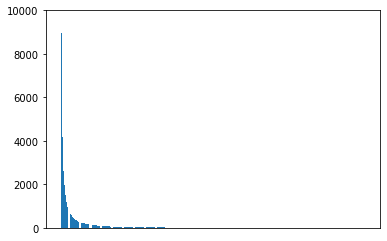

In [ ]:
import collections
ingredients_list = []
for i in df['ingredients'].index:
  # print(df['ingredients'][i][1:-1].split('\', \''))
  ingredients_list.extend(df['ingredients'][i][1:-1].replace('\'','').replace('\"','').replace(' ','').split(','))
print(len(ingredients_list))
ingredients_dict = dict(collections.Counter(ingredients_list))
# ingredients_label = list(ingredients_dict.keys())
# ingredients_count = list(ingredients_dict.values())
ingredients_tuple_list = sorted(ingredients_dict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
ingredients_label,ingredients_count = zip(*ingredients_tuple_list)
plt.bar(x=ingredients_label,height=ingredients_count)
plt.xticks([])
plt.ylim((0, 10000))
plt.show()

In [ ]:
print(len(ingredients_label))
print(ingredients_label[:100])
print(ingredients_count[:100])

print(ingredients_label[-500:])
print(ingredients_count[-500:])

14886
('salt', 'butter', 'sugar', 'onion', 'water', 'eggs', 'oliveoil', 'flour', 'milk', 'garliccloves', 'pepper', 'brownsugar', 'garlic', 'all-purposeflour', 'bakingpowder', 'egg', 'saltandpepper', 'parmesancheese', 'lemonjuice', 'bakingsoda', 'vegetableoil', 'vanilla', 'blackpepper', 'cinnamon', 'tomatoes', 'sourcream', 'garlicpowder', 'vanillaextract', 'oil', 'honey', 'onions', 'creamcheese', 'garlicclove', 'celery', 'cheddarcheese', 'unsaltedbutter', 'soysauce', 'mayonnaise', 'paprika', 'chickenbroth', 'worcestershiresauce', 'extravirginoliveoil', 'freshparsley', 'cornstarch', 'freshgroundblackpepper', 'carrots', 'parsley', 'chilipowder', 'bacon', 'groundcinnamon', 'carrot', 'lemon', 'potatoes', 'nutmeg', 'cayennepepper', 'granulatedsugar', 'groundcumin', 'groundbeef', 'greenonions', 'redonion', 'walnuts', 'pecans', 'dijonmustard', 'greenonion', 'koshersalt', 'powderedsugar', 'freshlemonjuice', 'heavycream', 'margarine', 'mozzarellacheese', 'driedoregano', 'orangejuice', 'zucchini'

In [ ]:
filter_threshold = 10
filter_ingredients_label = []
filter_ingredients_count = []
for i,e in enumerate(ingredients_label):
  if ingredients_count[i] >= filter_threshold:
    filter_ingredients_count.append(ingredients_count[i])
    filter_ingredients_label.append(e)
print(len(filter_ingredients_label))

5963


In [ ]:
print(filter_ingredients_label[:100])
print(filter_ingredients_count[:100])

print(filter_ingredients_label[-500:])
print(filter_ingredients_count[-500:])

['salt', 'butter', 'sugar', 'onion', 'water', 'eggs', 'oliveoil', 'flour', 'milk', 'garliccloves', 'pepper', 'brownsugar', 'garlic', 'all-purposeflour', 'bakingpowder', 'egg', 'saltandpepper', 'parmesancheese', 'lemonjuice', 'bakingsoda', 'vegetableoil', 'vanilla', 'blackpepper', 'cinnamon', 'tomatoes', 'sourcream', 'garlicpowder', 'vanillaextract', 'oil', 'honey', 'onions', 'creamcheese', 'garlicclove', 'celery', 'cheddarcheese', 'unsaltedbutter', 'soysauce', 'mayonnaise', 'paprika', 'chickenbroth', 'worcestershiresauce', 'extravirginoliveoil', 'freshparsley', 'cornstarch', 'freshgroundblackpepper', 'carrots', 'parsley', 'chilipowder', 'bacon', 'groundcinnamon', 'carrot', 'lemon', 'potatoes', 'nutmeg', 'cayennepepper', 'granulatedsugar', 'groundcumin', 'groundbeef', 'greenonions', 'redonion', 'walnuts', 'pecans', 'dijonmustard', 'greenonion', 'koshersalt', 'powderedsugar', 'freshlemonjuice', 'heavycream', 'margarine', 'mozzarellacheese', 'driedoregano', 'orangejuice', 'zucchini', 'rai

In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 23.9 MB 89 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from gensim.models import Word2Vec
import random

sen = []
word_list = []
for i in df['ingredients'].index:
  original = df['ingredients'][i][1:-1].replace('\'','').replace('\"','').replace(' ','').split(',')
  word_list.extend(df['ingredients'][i][1:-1].replace('\'','').replace('\"','').replace(',','').split(' '))
  sen.append(original)
  for j in range(2):
    random.shuffle(original)
    # print(original)
    sen.append(original)
print(len(sen))
print(sen[0])
model = Word2Vec(sen, vector_size=100, window=5, min_count=1, workers=4)
sims = model.wv.most_similar('onion', topn=50)
print(sims)

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


694911
['salt', 'mixedspice', 'oliveoil', 'wintersquash', 'butter', 'honey', 'mexicanseasoning']
[('onions', 0.9202852249145508), ('dicedonion', 0.8214640617370605), ('yellowonion', 0.813561737537384), ('sweetonion', 0.7974953651428223), ('whiteonion', 0.769166886806488), ('whiteonions', 0.7045252919197083), ('yellowonions', 0.6957391500473022), ('dicedonions', 0.6665351390838623), ('spanishonion', 0.6624970436096191), ('redonion', 0.6385906338691711), ('sweetonions', 0.5862812995910645), ('spanishonions', 0.5753371119499207), ('yellowsweetonion', 0.5617260932922363), ('vidaliaonion', 0.5582455396652222), ('cookingonion', 0.5303230881690979), ('redonions', 0.5294328927993774), ('smallonion', 0.5293272137641907), ('greenonions', 0.5235080718994141), ('vidaliaonions', 0.517425000667572), ('greenonion', 0.500123143196106), ('brownonion', 0.4768103063106537), ('driedonionflakes', 0.4729055166244507), ('driedkidneybeans', 0.46356505155563354), ('purpleonion', 0.45884937047958374), ('shallot

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

word_dict = dict(collections.Counter(word_list))
word_tuple_list = sorted(word_dict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)

main_ingredients_dict = {}
ingre_main_ingre_map = {}

for i in word_tuple_list[:200]:
  token = nlp(i[0])[0]
  if token.tag_ in ['NN','NNS','NNP','NNPS']:
    main_ingredients_dict[token.text] = []
    ingre_main_ingre_map[token.text] = token.text
    print(token.text, token.tag_)
  else:
    print(token.text, token.tag_)
  

salt NN
pepper NNP
sugar NN
oil NN
cheese NNP
fresh JJ
garlic NNP
butter NN
onion NN
ground NN
flour NN
powder NNP
cream NN
water NN
sauce NN
juice NNP
chicken NN
olive NN
milk NN
red NNP
black JJ
eggs NNP
baking NN
lemon NNP
green NNP
vanilla NN
cloves NNS
white NNP
egg NN
dried VBN
tomatoes NNS
brown NNP
vinegar NNP
cinnamon NNP
parsley NNP
onions NNS
and CC
beef NN
vegetable NNP
all DT
wine NN
chocolate NN
of IN
mustard NNP
extract NN
parmesan NNP
rice NNP
dry JJ
broth NNP
soda NNP
celery NNP
potatoes NNS
tomato NNP
cheddar NNP
chili NNP
beans NNS
sour NNP
orange NNP
ginger NNP
mix NNP
basil NNP
frozen JJ
bell NNP
leaves NNS
whole JJ
corn NN
cumin NNP
seasoning NNP
boneless NN
soy NN
clove NNP
oregano NNP
lime NNP
honey NNP
bread NN
thyme NNS
mayonnaise NNP
flakes NNS
soup NN
mushrooms NNS
unsalted JJ
cilantro NNP
chips NNS
paprika NNP
bacon NNP
light NN
nutmeg NNP
sweet JJ
hot JJ
skinless NNP
cayenne NNP
italian NNP
cooked JJ
breasts NNS
extra JJ
pork NN
yellow NNP
carrots NNP
coco

In [ ]:
# print(main_ingredients_dict)

miss = []
for i,e in enumerate(ingredients_label[:500]):
  simis = model.wv.most_similar(e, topn=10)
  find = False
  if e in ingre_main_ingre_map.keys():
    continue
  for simi in simis:
    simi = simi[0]
    if simi in ingre_main_ingre_map.keys():
      ingre_main_ingre_map[e] = ingre_main_ingre_map[simi]
      main_ingredients_dict[ingre_main_ingre_map[simi]].append(e)
      find = True
      break
  if not find:
    ingre_main_ingre_map[e] = e
    main_ingredients_dict[e] = []

for i,e in enumerate(ingredients_label[500:]):
  simis = model.wv.most_similar(e, topn=10)
  find = False
  if e in ingre_main_ingre_map.keys():
    continue
  for simi in simis:
    simi = simi[0]
    if simi in ingre_main_ingre_map.keys():
      ingre_main_ingre_map[e] = ingre_main_ingre_map[simi]
      main_ingredients_dict[ingre_main_ingre_map[simi]].append(e)      
      find = True
      break
  if not find:
    miss.append(e)

for i in main_ingredients_dict:
  print(i)
  print(main_ingredients_dict[i])

print(len(main_ingredients_dict))

print(len(miss))
print(miss)

salt
['koshersalt', 'seasalt', 'seasoningsalt', 'coarsesalt', 'tablesalt', 'coarseseasalt', 'fineseasalt', 'flakedseasalt', 'skordalia']
pepper
['saltandpepper', 'blackpepper', 'freshgroundblackpepper', 'groundblackpepper', 'freshgroundpepper', 'salt&freshlygroundblackpepper', 'whitepepper', 'salt&pepper', 'groundpepper', 'saltandblackpepper', 'crackedblackpepper', 'freshcoarsegroundblackpepper', 'lemonpepper', 'salt&freshgroundpepper', 'crackedpepper', 'coarseblackpepper', 'freshblackpepper', 'koshersalt&freshlygroundblackpepper', 'lemonpepperseasoning', 'lemon-pepperseasoning', 'freshgroundwhitepepper', 'garlicpepperseasoning', 'freshcrackedpepper', 'freshpepper', 'medium-drysherry', 'lemon&herbseasoning', 'cornmuffins', 'multi-grainrolls', 'smallquahogs']
sugar
['granulatedsugar', 'whitesugar']
oil
['vegetableoil', 'canolaoil', 'peanutoil', 'cookingoil', 'saladoil', 'cornoil', 'sunfloweroil', 'lightoliveoil', 'saffloweroil', 'lightvegetableoil', 'hollandrusks']
cheese
['cheddarchees

In [ ]:
sims = model.wv.most_similar('greenonions', topn=50)
print(sims)

[('greenonion', 0.9398824572563171), ('scallions', 0.812774121761322), ('scallion', 0.8118569254875183), ('greenoniontop', 0.6389333605766296), ('purpleonion', 0.5799490809440613), ('sweetonion', 0.5786887407302856), ('redonion', 0.569321870803833), ('springonions', 0.5485891103744507), ('greenonionswithtops', 0.5350920557975769), ('onion', 0.5235081315040588), ('greenonionswithtop', 0.5057917237281799), ('vidaliaonion', 0.5031701922416687), ('greenoniontops', 0.49867746233940125), ('springonion', 0.47909170389175415), ('freshbroccoliflorets', 0.47293052077293396), ('dicedonion', 0.4719317853450775), ('redonions', 0.4473603069782257), ('assortedfreshvegetables', 0.4470454454421997), ('chives', 0.4428141713142395), ('peapods', 0.4405556321144104), ('onions', 0.4348325729370117), ('shallot', 0.4312020242214203), ('sweetonions', 0.4299675524234772), ('napacabbageleaf', 0.42223745584487915), ('freshasparagus', 0.421501487493515), ('broccolifloret', 0.41877615451812744), ('freshchives', 0.4

In [ ]:
for i,e in enumerate(ingredients_label[:5]):
  print('-------------------------------')
  print(e)
  simis = model.wv.most_similar(e, topn=10)
  for simi in simis:
    print(simi)
    simi = simi[0]

-------------------------------
salt
('seasalt', 0.722131073474884)
('koshersalt', 0.6881412267684937)
('coarsesalt', 0.639961838722229)
('tablesalt', 0.6093803644180298)
('seasoningsalt', 0.581304132938385)
('fineseasalt', 0.45948123931884766)
('saltsubstitute', 0.38782641291618347)
('frozensouthwestcorn', 0.35735273361206055)
('coarseseasalt', 0.33477312326431274)
('saltandpepper', 0.3345690667629242)
-------------------------------
butter
('margarine', 0.8475558757781982)
('unsaltedbutter', 0.7755026817321777)
('saltedbutter', 0.6678184866905212)
('sweetbutter', 0.5931466817855835)
('realbutter', 0.501210629940033)
('sweetunsaltedbutter', 0.49499958753585815)
('oleo', 0.4646252989768982)
('full-fatmilk', 0.45002222061157227)
('shortening', 0.4477842152118683)
('oil', 0.4396553933620453)
-------------------------------
sugar
('whitesugar', 0.804598867893219)
('granulatedsugar', 0.7678717970848083)
('splendasugarsubstitute', 0.5606498718261719)
('splendagranular', 0.53586745262146)
('